In [11]:
def evaluate_classifier(df_positive, df_negative, pos_label=1, neg_label=0, title_suffix="", save_path=None):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import cross_val_predict
    from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
    import os

    # Labels setzen
    df_positive = df_positive.copy()
    df_negative = df_negative.copy()
    df_positive['Label'] = pos_label
    df_negative['Label'] = neg_label

    # Kombinieren
    data = pd.concat([df_positive, df_negative], ignore_index=True)

    # Visualisierung: Histogramm
    plt.figure()
    sns.histplot(data=data, x='z-score calculated from 7. 8. and 9.', hue='Label', kde=True, bins=50)
    plt.title(f"Distribution of z-scores {title_suffix}")
    plt.xlabel("z-Score")
    plt.ylabel("Anzahl")
    if save_path:
        filename = os.path.join(save_path, f"SISSIz_Histogram_{title_suffix.replace(' ', '_')}.png")
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

    # Vorbereitung
    X = data[['z-score calculated from 7. 8. and 9.']]
    y = data['Label']
    model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Cross-Validation
    y_pred = cross_val_predict(model, X, y, cv=5, method='predict')
    y_proba = cross_val_predict(model, X, y, cv=5, method='predict_proba')[:, 1]

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    labels = ["Negative", "Positive"]

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix {title_suffix}")
    if save_path:
        filename = os.path.join(save_path, f"SISSIz_Confusion_Matrix_{title_suffix.replace(' ', '_')}.png")
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

    print("\n Classification Report:\n", classification_report(y, y_pred))

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.2f})", color='red')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC-Curve {title_suffix}")
    plt.legend(loc="lower right")
    plt.grid(True)
    if save_path:
        filename = os.path.join(save_path, f"SISSIz_ROC_Curve_{title_suffix.replace(' ', '_')}.png")
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()


In [12]:
import pandas as pd

# Load the data
df_native = pd.read_excel("D:/Masterarbeit/2.Versuch/Result/Native_Results/SISSIz_Excel/native.xlsx", usecols=['z-score calculated from 7. 8. and 9.'])
df_sissiz_mono = pd.read_excel("D:/Masterarbeit/2.Versuch/Result/Native_Results/SISSIz_Excel/sissiz_mono.xlsx", usecols=['z-score calculated from 7. 8. and 9.'])
df_sissiz_di = pd.read_excel("D:/Masterarbeit/2.Versuch/Result/Native_Results/SISSIz_Excel/sissiz_di.xlsx", usecols=['z-score calculated from 7. 8. and 9.'])
df_multiperm_mono = pd.read_excel("D:/Masterarbeit/2.Versuch/Result/Native_Results/SISSIz_Excel/multiperm_mono.xlsx", usecols=['z-score calculated from 7. 8. and 9.'])
df_multiperm_di = pd.read_excel("D:/Masterarbeit/2.Versuch/Result/Native_Results/SISSIz_Excel/multiperm_di.xlsx", usecols=['z-score calculated from 7. 8. and 9.'])
df_aln_shuffle = pd.read_excel("D:/Masterarbeit/2.Versuch/Result/Native_Results/SISSIz_Excel/alifoldz.xlsx", usecols=['z-score calculated from 7. 8. and 9.'])

In [13]:
filter = 50

df_native_filterd = df_native[(df_native['z-score calculated from 7. 8. and 9.'] >= -filter) & (df_native['z-score calculated from 7. 8. and 9.'] <= filter)]
df_sissiz_mono_filterd = df_sissiz_mono[(df_sissiz_mono['z-score calculated from 7. 8. and 9.'] >= -filter) & (df_sissiz_mono['z-score calculated from 7. 8. and 9.'] <= filter)]
df_sissiz_di_filterd = df_sissiz_di[(df_sissiz_di['z-score calculated from 7. 8. and 9.'] >= -filter) & (df_sissiz_di['z-score calculated from 7. 8. and 9.'] <= filter)]
df_multiperm_mono_filterd = df_multiperm_mono[(df_multiperm_mono['z-score calculated from 7. 8. and 9.'] >= -filter) & (df_multiperm_mono['z-score calculated from 7. 8. and 9.'] <= filter)]
df_multiperm_di_filterd = df_multiperm_di[(df_multiperm_di['z-score calculated from 7. 8. and 9.'] >= -filter) & (df_multiperm_di['z-score calculated from 7. 8. and 9.'] <= filter)]
df_aln_shuffle_filterd = df_aln_shuffle[(df_aln_shuffle['z-score calculated from 7. 8. and 9.'] >= -filter) & (df_aln_shuffle['z-score calculated from 7. 8. and 9.'] <= filter)]

## SISSIz_MONO

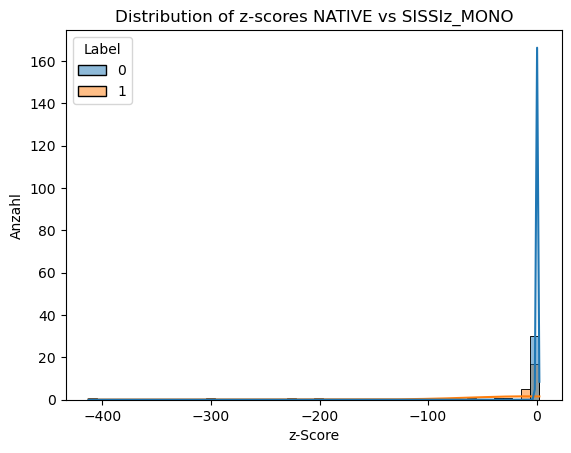

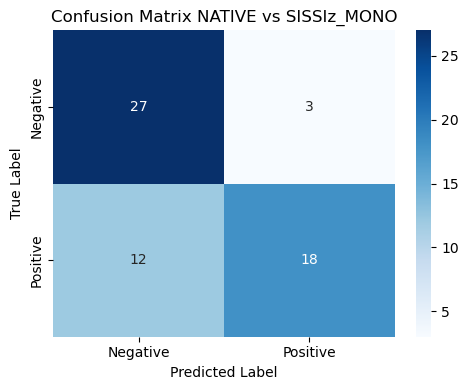


 Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.90      0.78        30
           1       0.86      0.60      0.71        30

    accuracy                           0.75        60
   macro avg       0.77      0.75      0.74        60
weighted avg       0.77      0.75      0.74        60



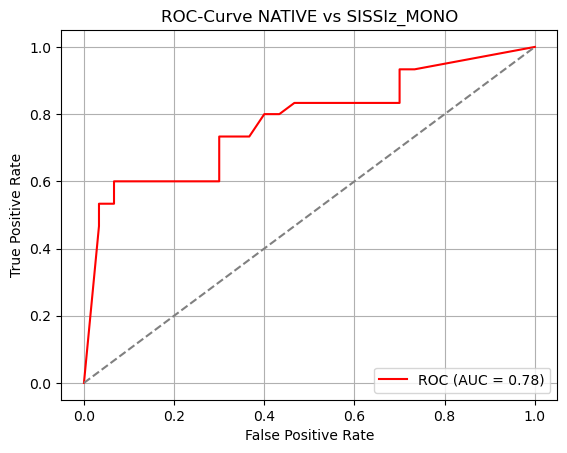

In [14]:
evaluate_classifier(df_native, df_sissiz_mono, title_suffix="NATIVE vs SISSIz_MONO", save_path="D:/Masterarbeit/2.Versuch/Result/Native_Results/SISSIz/")

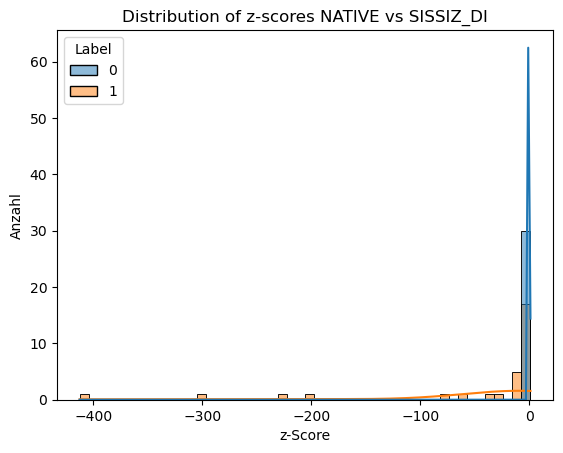

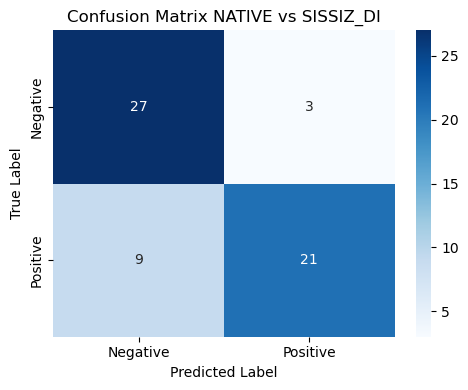


 Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82        30
           1       0.88      0.70      0.78        30

    accuracy                           0.80        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.81      0.80      0.80        60



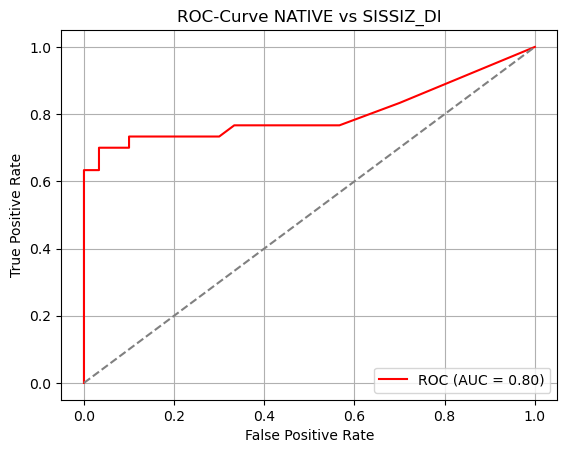

In [15]:
evaluate_classifier(df_native, df_sissiz_di,  title_suffix="NATIVE vs SISSIZ_DI", save_path="D:/Masterarbeit/2.Versuch/Result/Native_Results/SISSIz/")

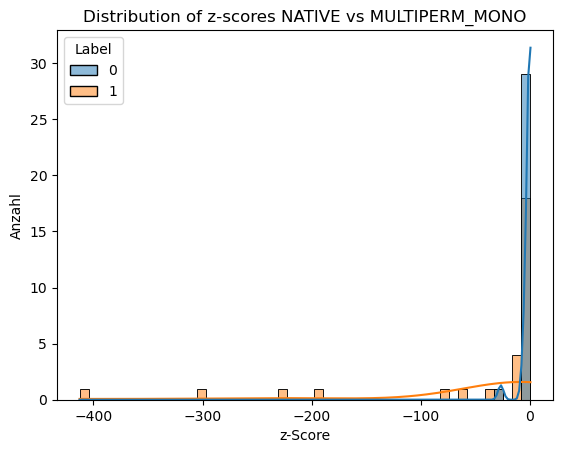

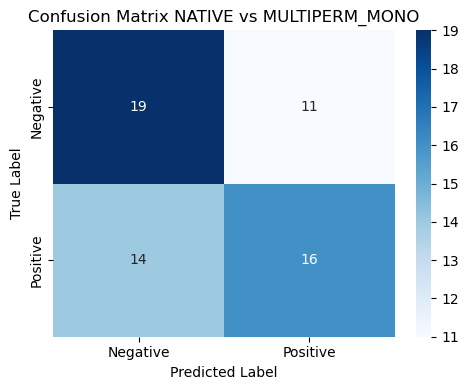


 Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.63      0.60        30
           1       0.59      0.53      0.56        30

    accuracy                           0.58        60
   macro avg       0.58      0.58      0.58        60
weighted avg       0.58      0.58      0.58        60



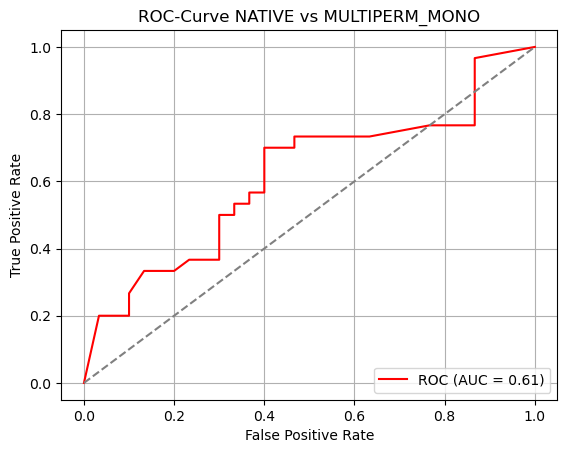

In [16]:
evaluate_classifier(df_native, df_multiperm_mono,  title_suffix="NATIVE vs MULTIPERM_MONO", save_path="D:/Masterarbeit/2.Versuch/Result/Native_Results/SISSIz/")

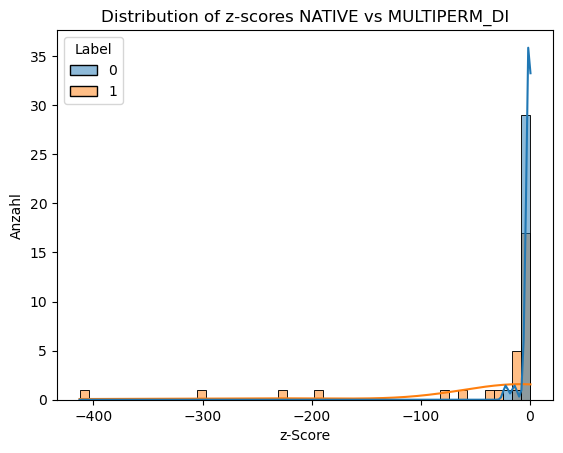

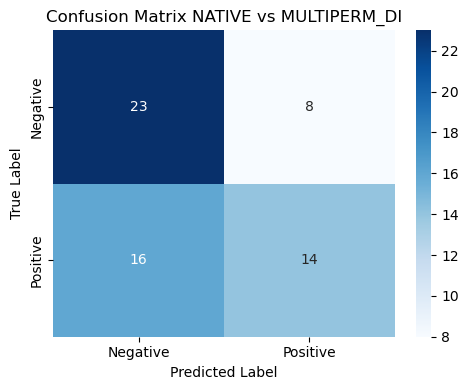


 Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.74      0.66        31
           1       0.64      0.47      0.54        30

    accuracy                           0.61        61
   macro avg       0.61      0.60      0.60        61
weighted avg       0.61      0.61      0.60        61



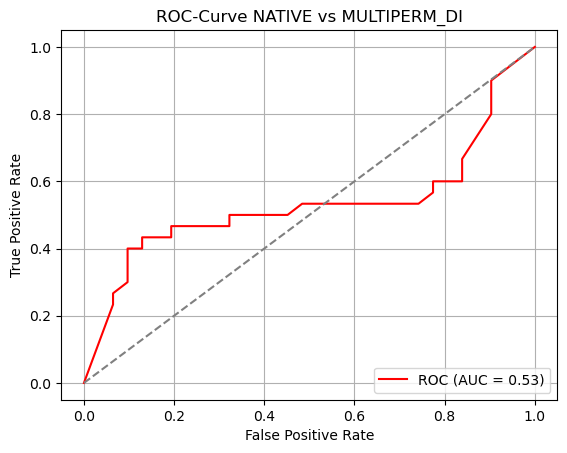

In [17]:
evaluate_classifier(df_native, df_multiperm_di,  title_suffix="NATIVE vs MULTIPERM_DI", save_path="D:/Masterarbeit/2.Versuch/Result/Native_Results/SISSIz/")

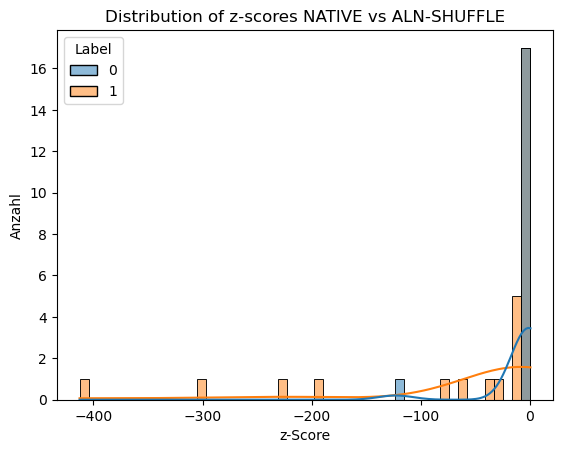

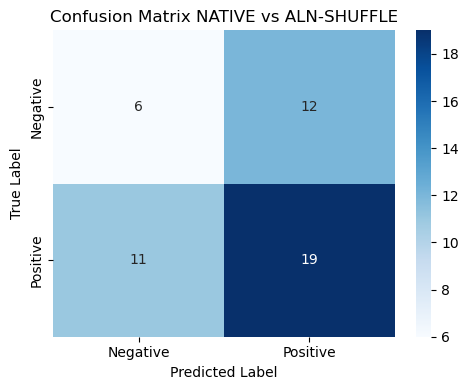


 Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.33      0.34        18
           1       0.61      0.63      0.62        30

    accuracy                           0.52        48
   macro avg       0.48      0.48      0.48        48
weighted avg       0.52      0.52      0.52        48



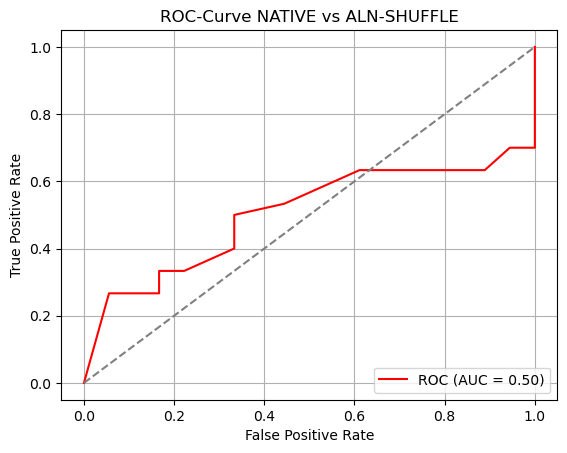

In [18]:
evaluate_classifier(df_native, df_aln_shuffle,  title_suffix="NATIVE vs ALN-SHUFFLE", save_path="D:/Masterarbeit/2.Versuch/Result/Native_Results/SISSIz/")

## With Filter

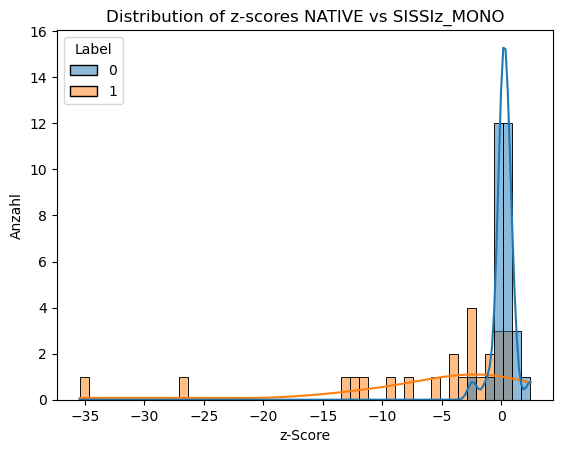

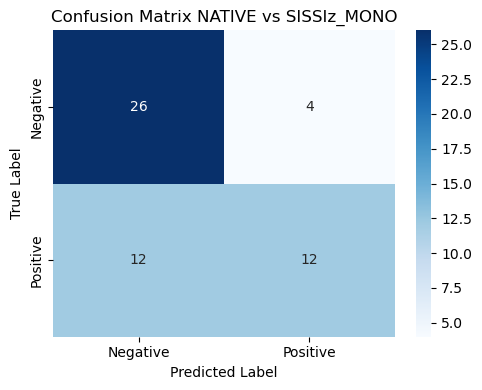


 Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.87      0.76        30
           1       0.75      0.50      0.60        24

    accuracy                           0.70        54
   macro avg       0.72      0.68      0.68        54
weighted avg       0.71      0.70      0.69        54



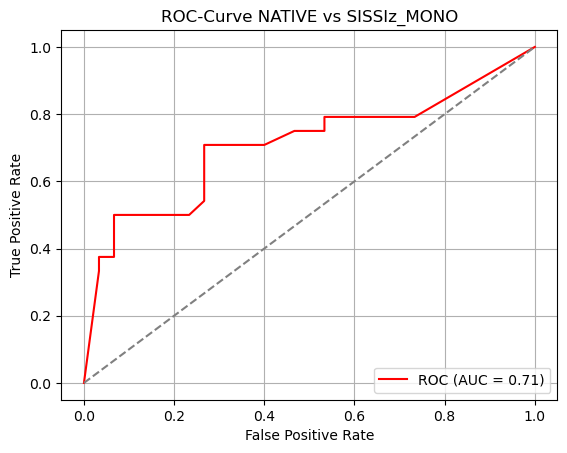

In [19]:
evaluate_classifier(df_native_filterd, df_sissiz_mono_filterd, title_suffix="NATIVE vs SISSIz_MONO", save_path="D:/Masterarbeit/2.Versuch/Result/Native_Results/SISSIz/")

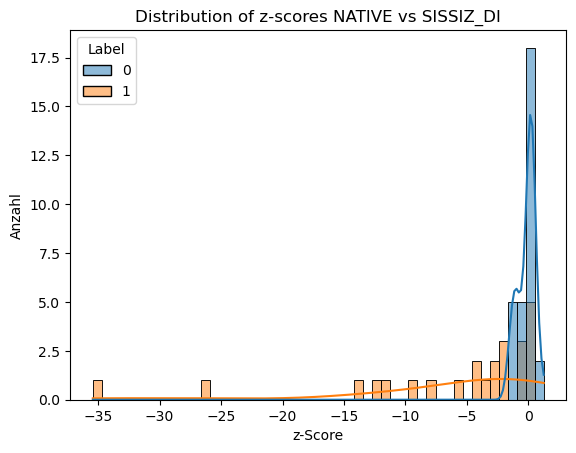

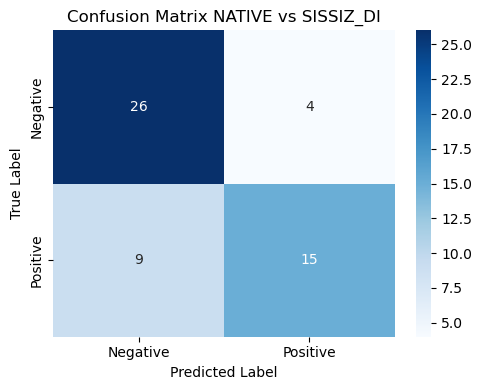


 Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.87      0.80        30
           1       0.79      0.62      0.70        24

    accuracy                           0.76        54
   macro avg       0.77      0.75      0.75        54
weighted avg       0.76      0.76      0.75        54



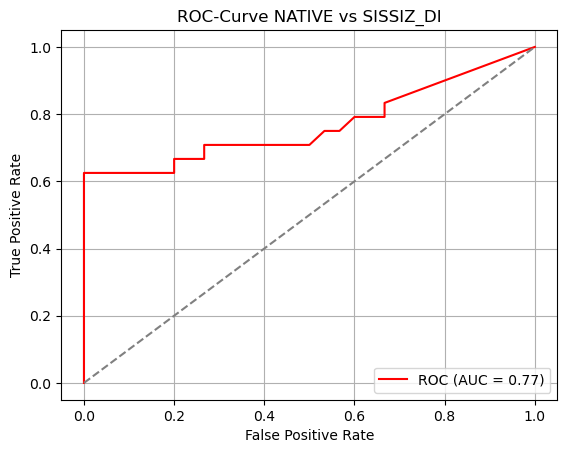

In [20]:
evaluate_classifier(df_native_filterd, df_sissiz_di_filterd,  title_suffix="NATIVE vs SISSIZ_DI", save_path="D:/Masterarbeit/2.Versuch/Result/Native_Results/SISSIz/")

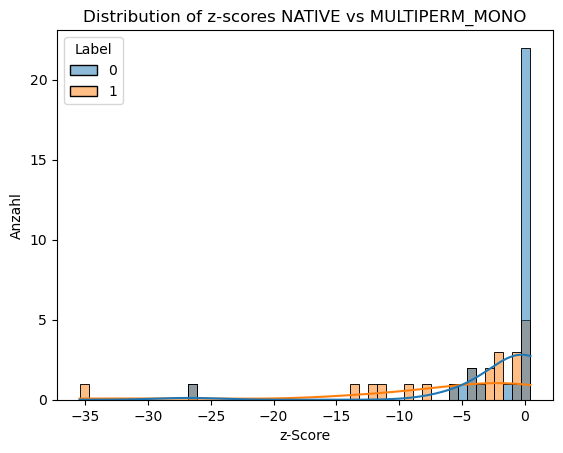

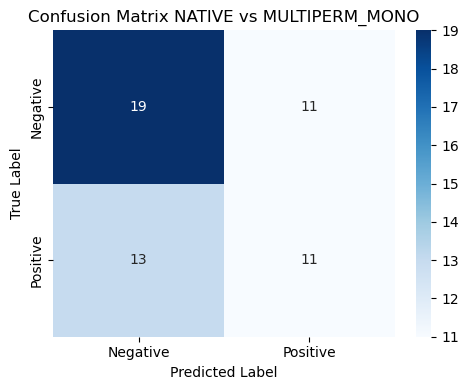


 Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.63      0.61        30
           1       0.50      0.46      0.48        24

    accuracy                           0.56        54
   macro avg       0.55      0.55      0.55        54
weighted avg       0.55      0.56      0.55        54



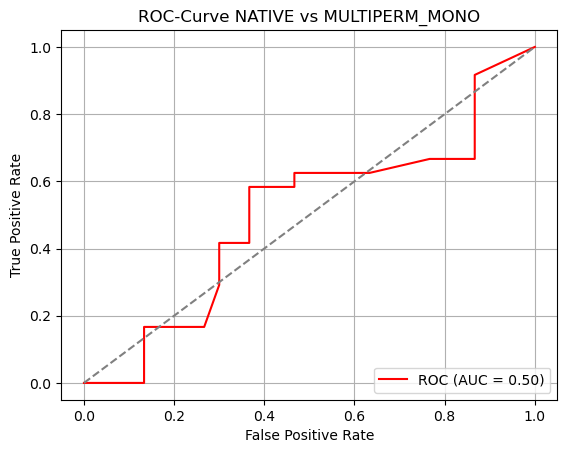

In [21]:
evaluate_classifier(df_native_filterd, df_multiperm_mono_filterd,  title_suffix="NATIVE vs MULTIPERM_MONO", save_path="D:/Masterarbeit/2.Versuch/Result/Native_Results/SISSIz/")

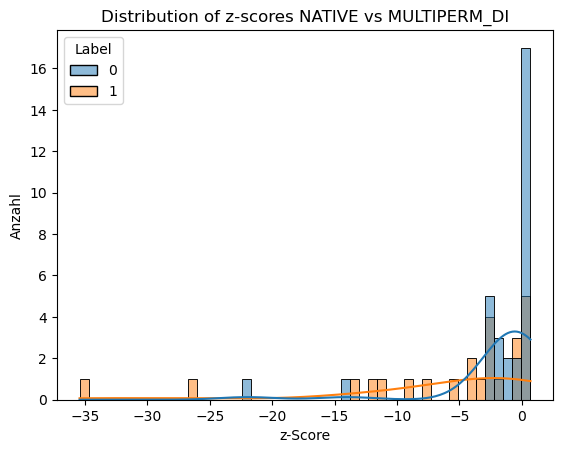

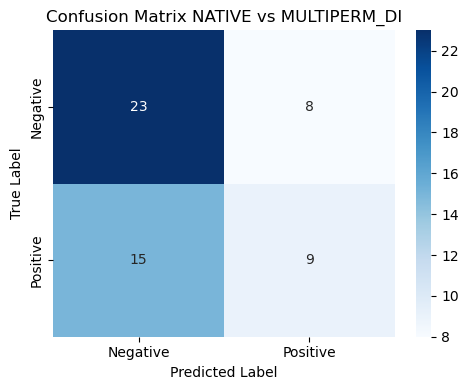


 Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.74      0.67        31
           1       0.53      0.38      0.44        24

    accuracy                           0.58        55
   macro avg       0.57      0.56      0.55        55
weighted avg       0.57      0.58      0.57        55



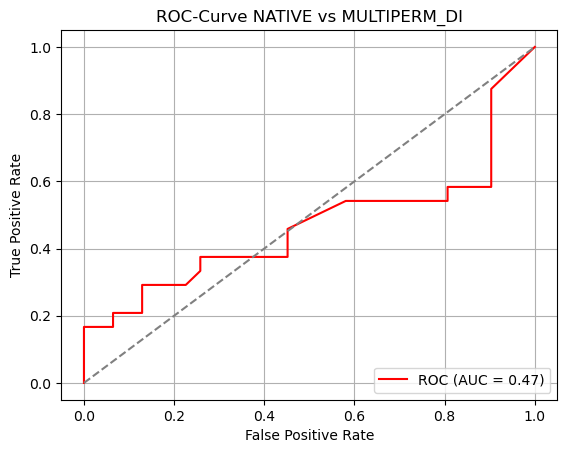

In [22]:
evaluate_classifier(df_native_filterd, df_multiperm_di_filterd,  title_suffix="NATIVE vs MULTIPERM_DI", save_path="D:/Masterarbeit/2.Versuch/Result/Native_Results/SISSIz/")

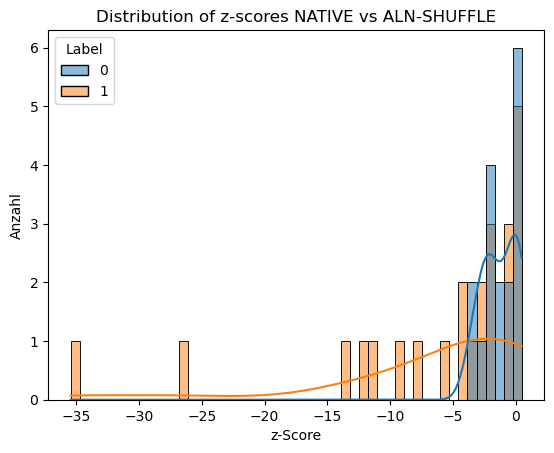

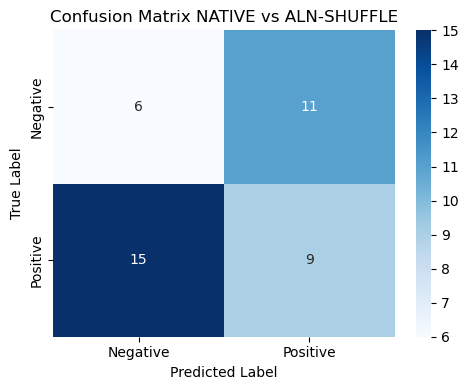


 Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.35      0.32        17
           1       0.45      0.38      0.41        24

    accuracy                           0.37        41
   macro avg       0.37      0.36      0.36        41
weighted avg       0.38      0.37      0.37        41



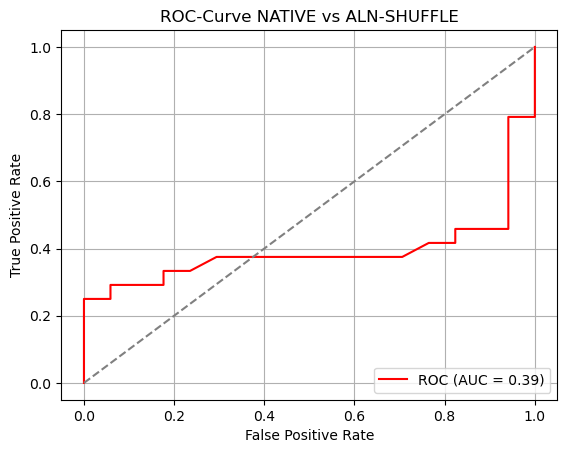

In [23]:
evaluate_classifier(df_native_filterd, df_aln_shuffle_filterd,  title_suffix="NATIVE vs ALN-SHUFFLE", save_path="D:/Masterarbeit/2.Versuch/Result/Native_Results/SISSIz/")